In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.tools import diff
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# FIRST PROJECT : US CANDY PREDICTIONS WITH SARIMAX MODELS

In [2]:
candy = pd.read_csv('/Users/nacersere/Downloads/candy_production.csv',index_col='date',parse_dates=['date'])
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


**Plot the data**

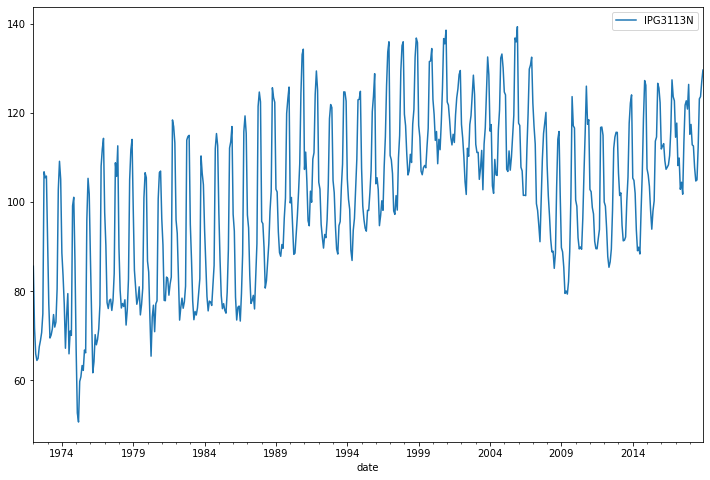

In [3]:
candy.plot(figsize=(12,8))
plt.show()

                            This data looks seasonal. let's verify that

In [4]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


     Since the data is monthly recorded & we have a seasonality, we can deduce that the seasonal order is m=12. let's verify that with acf plot 

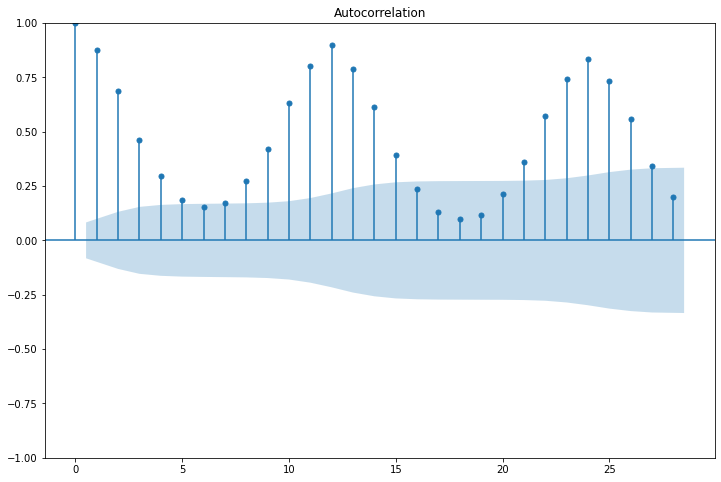

In [5]:
fig , ax1 = plt.subplots(figsize=(12,8))
plot_acf(candy['IPG3113N'],zero=True,ax=ax1)
plt.show()

In [6]:
adfuller(candy['IPG3113N'])

(-1.7760153075016147,
 0.39243275007139816,
 14,
 549,
 {'1%': -3.4423174665535385,
  '5%': -2.866818952732754,
  '10%': -2.569581505602171},
 3094.828881317046)

In [7]:
candy_seas_acf = candy - candy.rolling(15).mean()
candy_seas_acf = candy_seas_acf.dropna()

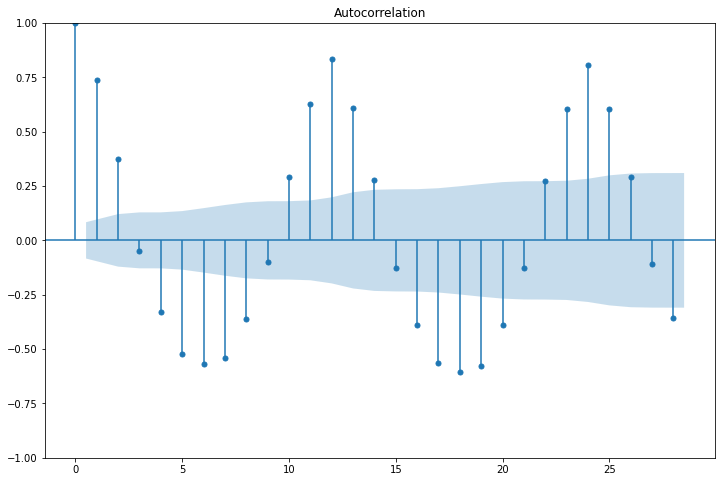

In [8]:
fig , ax1 = plt.subplots(figsize=(12,8))
plot_acf(candy_seas_acf['IPG3113N'],zero=True,ax=ax1)
plt.show()

In [9]:
adfuller(candy_seas_acf)

(-6.595859814027928,
 6.928509389819622e-09,
 14,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 2938.0800019038725)

    It seems the data seasonality order is m=12. Let's model it now. Let's determine the optimal order for the model.

In [10]:
auto_arima(candy['IPG3113N'],seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4068.017, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3299.353, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3716.757, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4066.060, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4030.917, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3159.701, Time=0.52 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3715.219, Time=0.41 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3154.202, Time=2.01 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=3155.743, Time=3.03 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3153.749, Time=1.70 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3558.732, Time=1.22 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3178.454, Time=1.51 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  564
Model:             SARIMAX(2, 1, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -1551.565
Date:                                 Sat, 20 Aug 2022   AIC                           3123.130
Time:                                         11:44:21   BIC                           3166.463
Sample:                                              0   HQIC                          3140.047
                                                 - 564                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.001      0.229      0.819      -0.002       0.002
ar.L1         -0.1505      0.069     -2.191      0.028      -0.285      -0.016
ar.L2          0.7658      0.058     13.144      0.000       0.652       0.880
ma.L1         -0.1577      0.083     -1.900      0.057      -0.320       0.005
ma.L2         -0.9351      0.037    -25.115      0.000      -1.008      -0.862
ma.L3          0.1672      0.061      2.721      0.007       0.047       0.288
ar.S.L12       0.9936      0.002    501.027      0.000       0.990       0.998
ma.S.L12      -0.5986      0.040    -15.052      0.000      -0.677      -0.521
ma.S.L24      -0.1344      0.040     -3.390      0.001      -0.212      -0.057
sigma2        13.6664      0.699     19.539      0.000      12.295      15.037
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                32.32
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.20
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
print(len(candy))

564


In [12]:
564 - 24

540

In [13]:
train = candy.iloc[:540]
test = candy.iloc[540:]

In [14]:
model = SARIMAX(train['IPG3113N'],order=(2,1,3),seasonal_order=(1,0,2,12))
results = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06003D+00    |proj g|=  8.83370D-02

At iterate    5    f=  2.81348D+00    |proj g|=  2.00114D-01

At iterate   10    f=  2.78496D+00    |proj g|=  4.16924D-02

At iterate   15    f=  2.75378D+00    |proj g|=  2.16092D-02

At iterate   20    f=  2.74690D+00    |proj g|=  5.81278D-03

At iterate   25    f=  2.74613D+00    |proj g|=  2.16273D-03

At iterate   30    f=  2.74516D+00    |proj g|=  1.24473D-02

At iterate   35    f=  2.74500D+00    |proj g|=  8.25491D-04

At iterate   40    f=  2.74497D+00    |proj g|=  4.79783D-04

At iterate   45    f=  2.74473D+00    |proj g|=  2.52903D-03

At iterate   50    f=  2.74467D+00    |proj g|=  3.18335D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
start = len(train)
end = len(train) + len(test) - 1 

In [16]:
predictions = results.predict(start,end).rename('Model predictions')
predictions

2017-01-01    109.770506
2017-02-01    108.855173
2017-03-01    107.077236
2017-04-01    102.082610
2017-05-01     99.506098
2017-06-01    100.188597
2017-07-01    100.905719
2017-08-01    106.986728
2017-09-01    113.176753
2017-10-01    124.660475
2017-11-01    124.202990
2017-12-01    123.136393
2018-01-01    109.572004
2018-02-01    108.404577
2018-03-01    106.189279
2018-04-01    101.043536
2018-05-01     98.311621
2018-06-01     99.143685
2018-07-01     99.931374
2018-08-01    106.892119
2018-09-01    112.977888
2018-10-01    124.474127
2018-11-01    124.547543
2018-12-01    123.411949
Freq: MS, Name: Model predictions, dtype: float64

In [17]:
test

,IPG3113N
date,
2017-01-01,114.517938
2017-02-01,117.693169
2017-03-01,108.170772
2017-04-01,109.863949
2017-05-01,102.847162
2017-06-01,104.430882
2017-07-01,101.751101
2017-08-01,113.390618
2017-09-01,121.700707


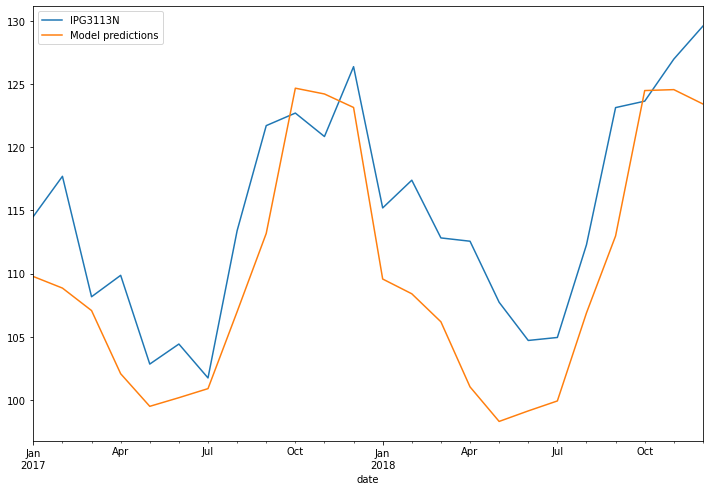

In [18]:
test.plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)
plt.show()

In [19]:
mean_squared_error(test,predictions)

39.245631655114416

In [20]:
np.sqrt(mean_squared_error(test,predictions))

6.26463340149401

In [21]:
test.mean()

IPG3113N    114.799664
dtype: float64

In [22]:
model = SARIMAX(candy['IPG3113N'],order=(2,1,3),seasonal_order=(1,0,2,12))
results = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05344D+00    |proj g|=  8.78746D-02

At iterate    5    f=  2.80482D+00    |proj g|=  1.72413D-01

At iterate   10    f=  2.77150D+00    |proj g|=  5.41067D-02

At iterate   15    f=  2.74991D+00    |proj g|=  6.14208D-03

At iterate   20    f=  2.74863D+00    |proj g|=  1.63862D-03

At iterate   25    f=  2.74754D+00    |proj g|=  7.66871D-03

At iterate   30    f=  2.74723D+00    |proj g|=  2.78794D-04

At iterate   35    f=  2.74720D+00    |proj g|=  1.21413D-03

At iterate   40    f=  2.74711D+00    |proj g|=  1.47619D-03

At iterate   45    f=  2.74709D+00    |proj g|=  2.73088D-04


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.74709D+00    |proj g|=  8.16710D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     61      1     0     0   8.167D-05   2.747D+00
  F =   2.7470900693372213     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [23]:
start = len(candy)
end = len(candy) + 24

In [24]:
predictions = results.predict(start,end).rename('Model Predictions')
predictions

2019-01-01    116.421234
2019-02-01    117.093801
2019-03-01    112.528894
2019-04-01    110.157004
2019-05-01    105.641990
2019-06-01    104.986627
2019-07-01    104.800578
2019-08-01    112.480080
2019-09-01    120.412908
2019-10-01    126.122955
2019-11-01    127.113171
2019-12-01    128.247115
2020-01-01    115.614510
2020-02-01    116.067926
2020-03-01    111.578770
2020-04-01    108.951067
2020-05-01    104.615866
2020-06-01    104.481172
2020-07-01    104.292533
2020-08-01    112.161291
2020-09-01    119.648517
2020-10-01    126.151579
2020-11-01    126.732997
2020-12-01    127.732158
2021-01-01    115.368898
Freq: MS, Name: Model Predictions, dtype: float64

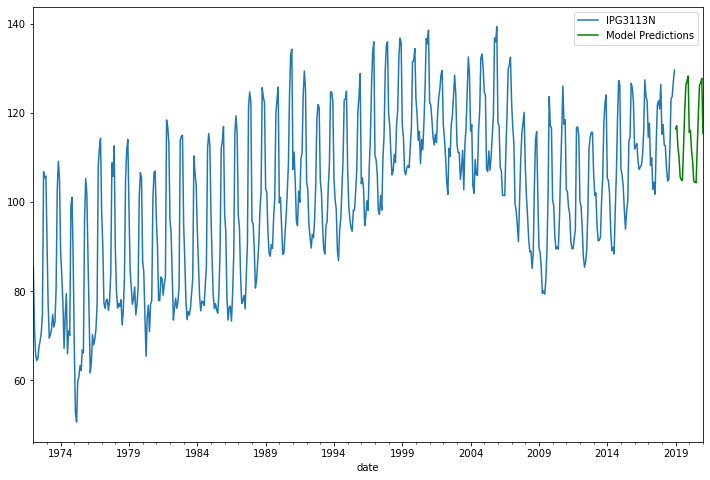

In [25]:
candy.plot(kind='line',figsize=(12,8),legend=True)
predictions.plot(legend=True,color='green')
plt.show()

# SECOND PROJECT  : MILK PRODUCTIONS 

In [26]:
milk_prod = pd.read_csv('/Users/nacersere/Downloads/milk_production.csv',parse_dates=['date'],index_col='date')
milk_prod.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


> Let's plot the data to see it 

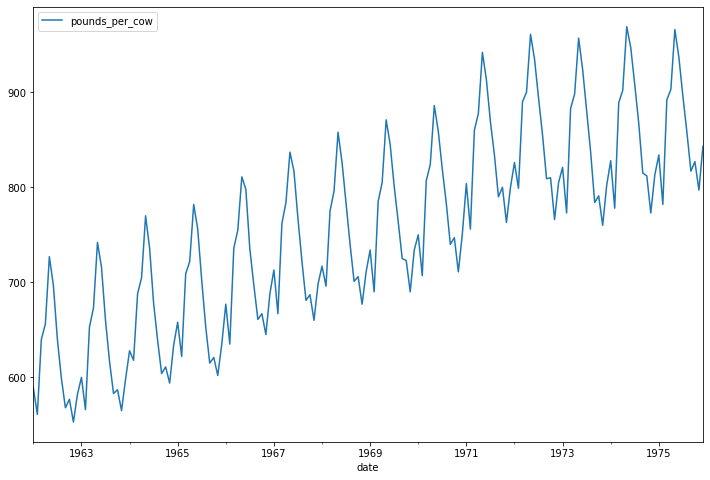

In [27]:
milk_prod.plot(kind='line',figsize=(12,8))
plt.show()

In [28]:
adfuller(milk_prod)

(-1.3038115874221354,
 0.627426708603029,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

            The data seems to be non stationnary. Let's stationnarise the variance of the data

In [29]:
from scipy.stats import boxcox

In [30]:
milk_prod['boxcox'],lam = boxcox(milk_prod['pounds_per_cow'])

In [31]:
milk_prod.head()

,pounds_per_cow,boxcox
date,,
1962-01-01,589.0,249.291586
1962-02-01,561.0,239.270408
1962-03-01,640.0,267.350037
1962-04-01,656.0,272.966737
1962-05-01,727.0,297.632271


In [32]:
print(f'Le lambda optimal pour transformer les données est : {lam}')

Le lambda optimal pour transformer les données est : 0.8382967311348767


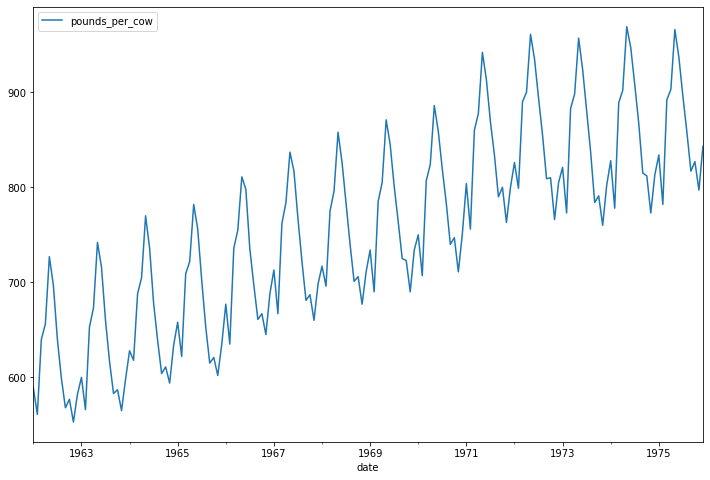

In [33]:
milk_prod.plot(y='pounds_per_cow',kind='line',figsize=(12,8))
plt.show()

                 Greaat!!! Let's discover the optimal order of the seasonal components

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


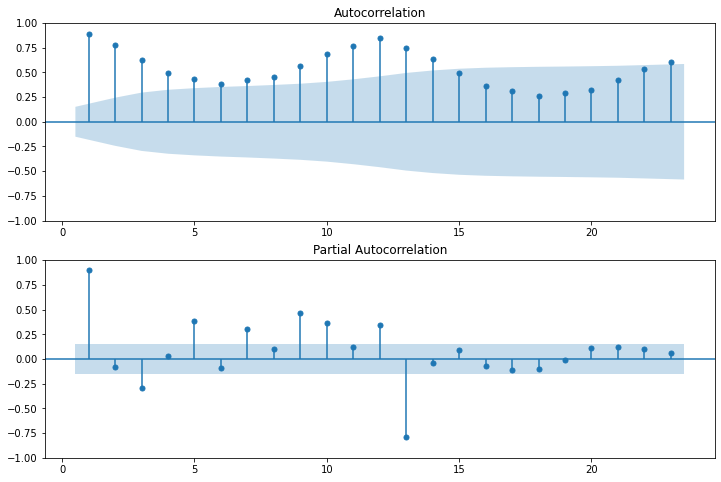

In [34]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(milk_prod['boxcox'],zero=False,ax=ax1)
plot_pacf(milk_prod['boxcox'],zero=False,ax=ax2)
plt.show()

                            The optimal seasonal order is m = 12 

In [35]:
milk_prod_seas = milk_prod - milk_prod.rolling(15).mean()
milk_prod_seas = milk_prod_seas.dropna()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


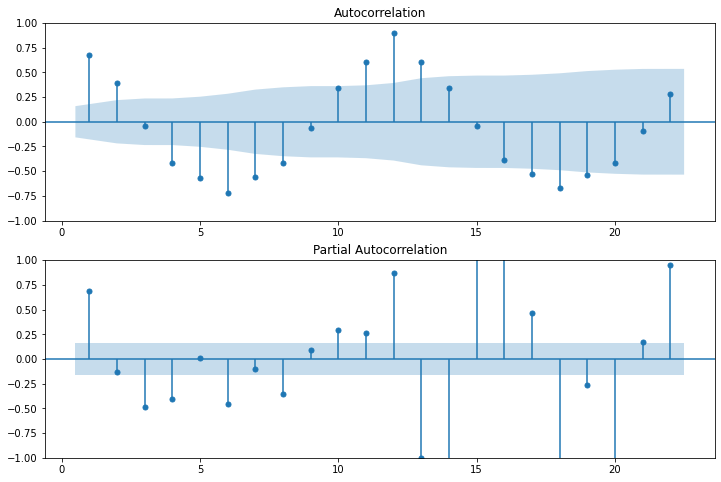

In [36]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(milk_prod_seas['boxcox'],zero=False,ax=ax1)
plot_pacf(milk_prod_seas['boxcox'],zero=False,ax=ax2)
plt.show()

                                        m = 12 

**Let's use the auto_arima function to determine the optimal order of the data**

In [37]:
auto_arima(milk_prod['boxcox'],seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=743.156, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=990.030, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=759.928, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=878.277, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1118.796, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=741.264, Time=0.78 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=788.093, Time=0.16 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=743.139, Time=2.08 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=757.228, Time=0.55 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=742.551, Time=3.78 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=739.797, Time=0.41 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=787.523, Time=0.10 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=741.686, Time=0.55 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=741.667, Time=1.06 sec
 ARIMA(1,0,2)(1,1,0)[12] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -364.115
Date:                              Sat, 20 Aug 2022   AIC                            738.230
Time:                                      11:46:07   BIC                            753.479
Sample:                                           0   HQIC                           744.423
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5480      0.314      1.747      0.081      -0.067       1.163
ar.L1          0.7411      0.082      9.046      0.000       0.581       0.902
ar.L2          0.1794      0.079      2.281      0.023       0.025       0.333
ma.S.L12      -0.6332      0.073     -8.616      0.000      -0.777      -0.489
sigma2         5.9521      0.599      9.929      0.000       4.777       7.127
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                39.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.78
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
auto_arima(milk_prod['pounds_per_cow'],seasonal=True,m=12,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1076.442, Time=1.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1324.708, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1092.340, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1211.922, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1452.434, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1074.582, Time=0.74 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1119.880, Time=0.24 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1076.422, Time=2.20 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1089.179, Time=0.72 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1073.351, Time=0.56 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1119.515, Time=0.15 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1075.202, Time=0.81 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1075.178, Time=1.56 sec
 ARIMA(1,0,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Sat, 20 Aug 2022   AIC                           1072.066
Time:                                      11:46:53   BIC                           1087.315
Sample:                                           0   HQIC                          1078.260
                                              - 168                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1          0.7310      0.084      8.737      0.000       0.567       0.895
ar.L2          0.1887      0.080      2.355      0.019       0.032       0.346
ma.S.L12      -0.6166      0.073     -8.403      0.000      -0.760      -0.473
sigma2        50.7122      4.915     10.317      0.000      41.078      60.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

> Train & Test Split

In [39]:
milk_prod = milk_prod.loc[:,['boxcox']]
milk_prod

,boxcox
date,
1962-01-01,249.291586
1962-02-01,239.270408
1962-03-01,267.350037
1962-04-01,272.966737
1962-05-01,297.632271
...,...
1975-08-01,342.155508
1975-09-01,328.347348
1975-10-01,331.725321


In [40]:
print(len(milk_prod))

168


In [41]:
print(len(milk_prod) - 12 )

156


In [42]:
train = milk_prod[:156]
test = milk_prod[156:]

In [43]:
model = SARIMAX(train['boxcox'],order=(2,0,0),seasonal_order=(0,1,1,12))
result = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42983D+00    |proj g|=  5.76025D-01

At iterate    5    f=  2.20562D+00    |proj g|=  2.20256D-02

At iterate   10    f=  2.19086D+00    |proj g|=  1.67349D-02

At iterate   15    f=  2.18894D+00    |proj g|=  5.12782D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   9.500D-06   2.189D+00
  F =   2.1889418603590793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [44]:
start = len(train)
end = len(train) + len(test) - 1

In [45]:
predictions = result.predict(start=start,end=end).rename('SARIMA(2,0,0)x(0,1,1,12)')
predictions

1975-01-01    335.545512
1975-02-01    320.390502
1975-03-01    355.706818
1975-04-01    360.436629
1975-05-01    381.362604
1975-06-01    372.541326
1975-07-01    358.617353
1975-08-01    344.938169
1975-09-01    328.333455
1975-10-01    329.023342
1975-11-01    316.506156
1975-12-01    330.078382
Freq: MS, Name: SARIMA(2,0,0)x(0,1,1,12), dtype: float64

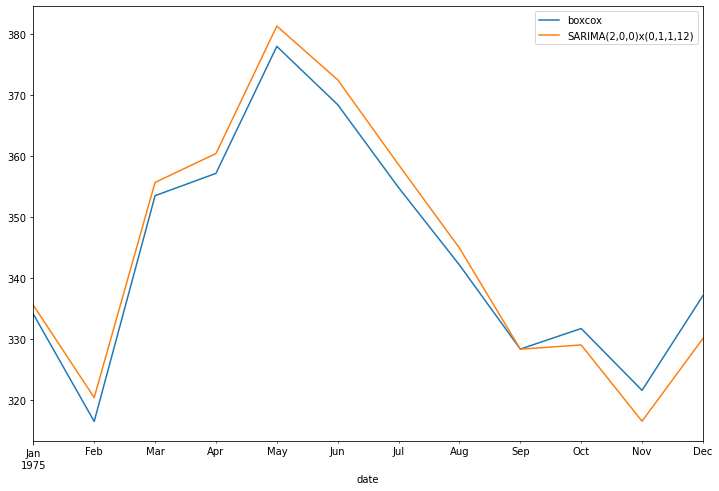

In [46]:
test.plot(kind='line',figsize=(12,8),legend=True)
predictions.plot(legend=True)
plt.show()

In [47]:
from statsmodels.tools.eval_measures import rmse

In [48]:
rmse(test['boxcox'],predictions)

3.7064070735850136

In [49]:
test.mean()

boxcox    343.628773
dtype: float64

          Woooaaaahhh the model seems to be perfect. Let's retrain all the model & predict the future

In [50]:
model = SARIMAX(milk_prod['boxcox'],order=(2,0,0),seasonal_order=(0,1,1,12))
result = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41186D+00    |proj g|=  5.51238D-01

At iterate    5    f=  2.20499D+00    |proj g|=  2.20273D-02

At iterate   10    f=  2.18919D+00    |proj g|=  1.49559D-02

At iterate   15    f=  2.18693D+00    |proj g|=  8.91853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     21      1     0     0   2.565D-06   2.187D+00
  F =   2.1869127654372114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [51]:
start = len(milk_prod)
end = len(milk_prod) + 12

In [52]:
predictions = result.predict(start,end).rename('SARIMA(2,0,0)x(0,1,1,12) predictions')
predictions

1976-01-01    344.656494
1976-02-01    328.663752
1976-03-01    364.502041
1976-04-01    368.803450
1976-05-01    389.639163
1976-06-01    380.482455
1976-07-01    366.598772
1976-08-01    353.230714
1976-09-01    337.636458
1976-10-01    339.283429
1976-11-01    327.603106
1976-12-01    341.847562
1977-01-01    349.629530
Freq: MS, Name: SARIMA(2,0,0)x(0,1,1,12) predictions, dtype: float64

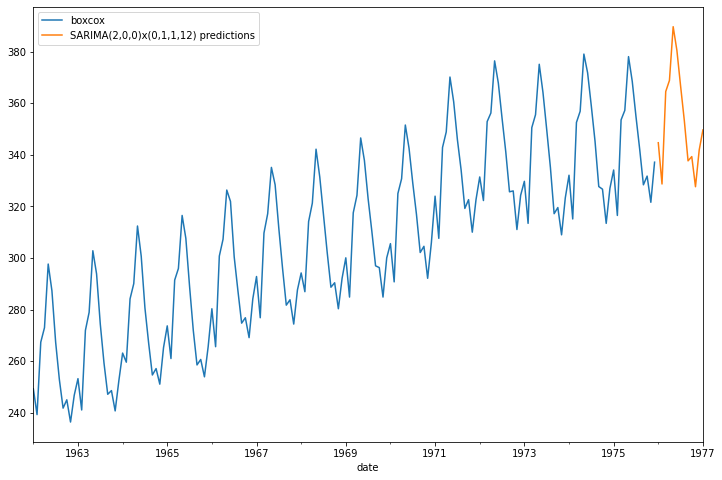

In [53]:
milk_prod.plot(kind='line',figsize=(12,8))
predictions.plot(legend=True)
plt.show()

# Third Project : BEER WINE LIQUOR

In [54]:
beer = pd.read_csv('/Users/nacersere/Downloads/UDEMY_TSA_FINAL/Data/BeerWineLiquor.csv',parse_dates=['date'],index_col='date')
beer.head()

,beer
date,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


> Plot the data

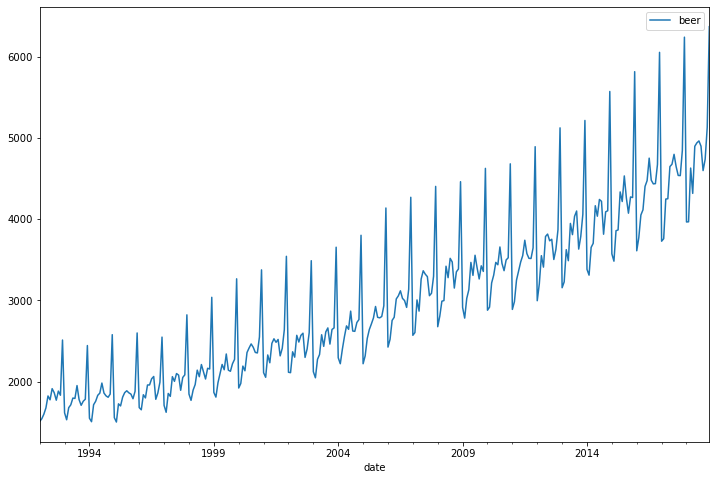

In [55]:
beer.plot(kind='line',figsize=(12,8))
plt.show()

                   The data seems to be not stationary

In [56]:
adfuller(beer)

(2.8643085078972685,
 1.0,
 15,
 308,
 {'1%': -3.45176116018037,
  '5%': -2.870970093607691,
  '10%': -2.571794416006072},
 3570.218090367952)

                  The variance of the data increases with time 

In [57]:
beer['boxcox'], lam = boxcox(beer['beer'])

In [58]:
print(lam)

-0.13620753600646096


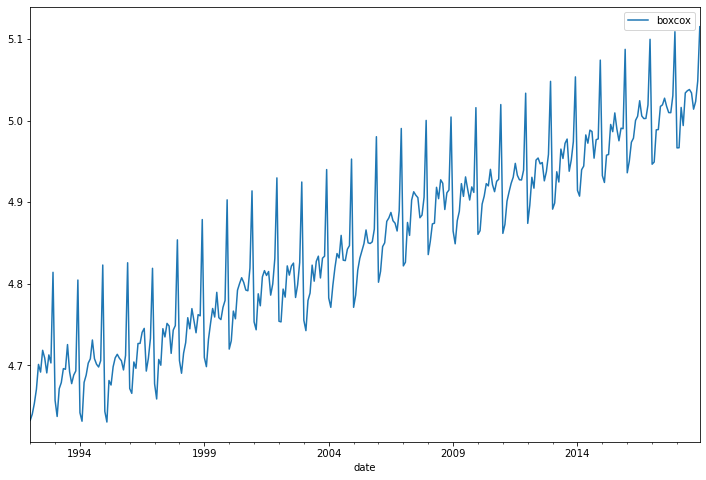

In [59]:
beer.plot(y='boxcox',figsize=(12,8),kind='line')
plt.show()

                         Let's determine the order of the seasonal component

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


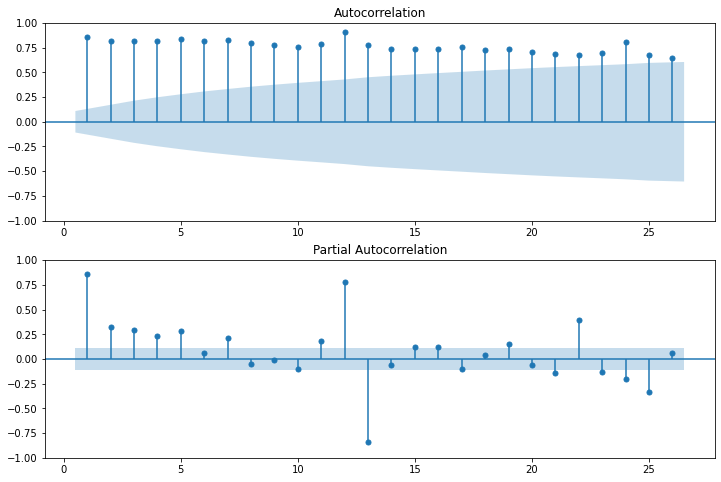

In [60]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(beer['boxcox'],zero=False,ax=ax1)
plot_pacf(beer['boxcox'],zero=False,ax=ax2)
plt.show()

                                         m = 12

In [61]:
beer_seas = beer - beer.rolling(15).mean()
beer_seas = beer_seas.dropna()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


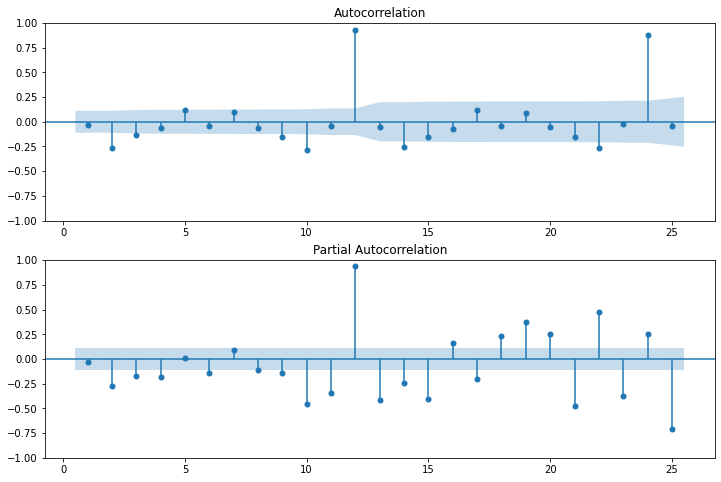

In [62]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(beer_seas['boxcox'],zero=False,ax=ax1)
plot_pacf(beer_seas['boxcox'],zero=False,ax=ax2)
plt.show()

                                        m = 12

**let's determine the optimal order of a SARIMA model for the data**

In [63]:
beer = beer.loc[:,['beer']]

In [64]:
stepwise_fit = auto_arima(beer['beer'],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=3609.756, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3828.363, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3709.263, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3643.628, Time=0.27 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=3613.374, Time=0.81 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=3618.817, Time=0.58 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=3609.518, Time=3.93 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=3615.656, Time=1.95 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=inf, Time=6.77 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=3610.692, Time=3.51 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=3623.872, Time=2.84 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=3621.013, Time=3.60 sec
 ARIMA(3,1,2)(2,1,1)[12]             : AIC=3605.622, Time=5.00 sec
 ARIMA(3,1,2)(1,1,1)[12]             : AIC=3606.491, Time=2.24 sec
 ARIMA(3,1,2)(2,1,0)[12]

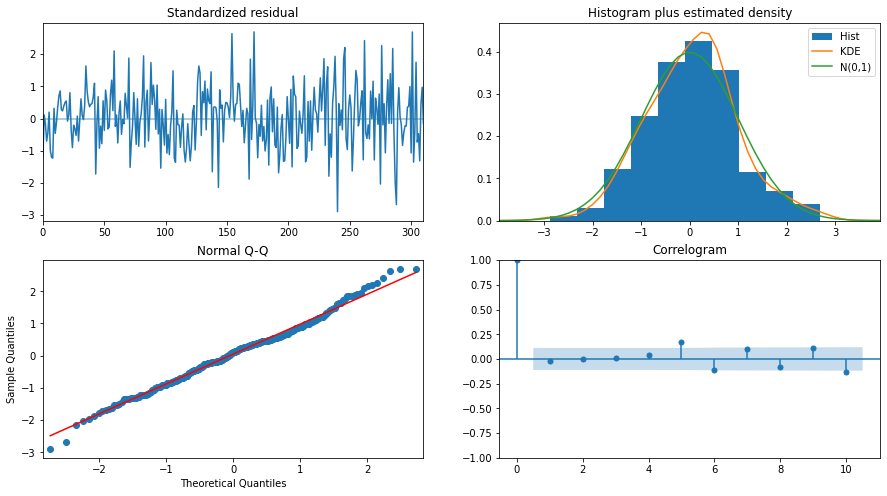

In [65]:
stepwise_fit.plot_diagnostics(figsize=(15,8))
plt.show()

In [66]:
print(len(beer))

324


In [67]:
print(len(beer) - 24)

300


In [68]:
train = beer[:300]
test = beer[300:]

In [69]:
model = SARIMAX(beer['beer'],order=(4,1,3),seasonal_order=(2,1,1,12))
result = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58724D+00    |proj g|=  9.73922D-01

At iterate    5    f=  5.51776D+00    |proj g|=  2.29702D-02

At iterate   10    f=  5.50953D+00    |proj g|=  2.17113D-02

At iterate   15    f=  5.50129D+00    |proj g|=  5.20609D-02

At iterate   20    f=  5.49229D+00    |proj g|=  4.04921D-02

At iterate   25    f=  5.49193D+00    |proj g|=  7.84116D-03

At iterate   30    f=  5.49033D+00    |proj g|=  5.28577D-02

At iterate   35    f=  5.48569D+00    |proj g|=  1.26243D-01

At iterate   40    f=  5.48049D+00    |proj g|=  1.99549D-01

At iterate   45    f=  5.47774D+00    |proj g|=  1.42909D-02


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.47663D+00    |proj g|=  2.33438D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   2.334D-02   5.477D+00
  F =   5.4766256433383456     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [70]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 beer   No. Observations:                  324
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1774.427
Date:                              Sat, 20 Aug 2022   AIC                           3570.853
Time:                                      11:51:23   BIC                           3611.991
Sample:                                  01-01-1992   HQIC                          3587.297
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0164      0.088    -11.545      0.000      -1.189      -0.844
ar.L2         -0.57

In [71]:
start = len(train)
end = len(train) + len(test) - 1

In [72]:
predictions = result.predict(start,end).rename('SARIMAX(4,1,3)x(2,1,1,12)')
predictions

2017-01-01    3878.941695
2017-02-01    3964.482470
2017-03-01    4230.586196
2017-04-01    4177.404501
2017-05-01    4643.420554
2017-06-01    4691.249786
2017-07-01    4862.267936
2017-08-01    4681.510358
2017-09-01    4555.622388
2017-10-01    4553.940126
2017-11-01    4818.836111
2017-12-01    6211.916780
2018-01-01    3888.695958
2018-02-01    4049.170866
2018-03-01    4422.373433
2018-04-01    4421.231086
2018-05-01    4929.882434
2018-06-01    4804.671882
2018-07-01    5019.266780
2018-08-01    4934.263308
2018-09-01    4699.191429
2018-10-01    4702.068430
2018-11-01    5055.379710
2018-12-01    6381.934809
Freq: MS, Name: SARIMAX(4,1,3)x(2,1,1,12), dtype: float64

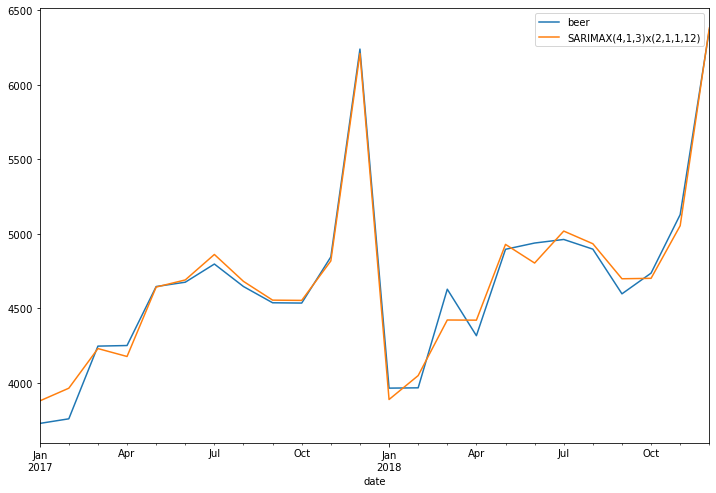

In [73]:
test.plot(kind='line',figsize=(12,8),legend=True)
predictions.plot(legend=True)
plt.show()

In [74]:
rmse(test['beer'],predictions)

87.8883755889644

In [75]:
test.mean()

beer    4680.166667
dtype: float64

                    The model seems very well

In [76]:
model = SARIMAX(beer['beer'],order=(4,1,3),seasonal_order=(2,1,1,12))
result = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58724D+00    |proj g|=  9.73922D-01

At iterate    5    f=  5.51776D+00    |proj g|=  2.29702D-02

At iterate   10    f=  5.50953D+00    |proj g|=  2.17113D-02

At iterate   15    f=  5.50129D+00    |proj g|=  5.20609D-02

At iterate   20    f=  5.49229D+00    |proj g|=  4.04921D-02

At iterate   25    f=  5.49193D+00    |proj g|=  7.84116D-03

At iterate   30    f=  5.49033D+00    |proj g|=  5.28577D-02

At iterate   35    f=  5.48569D+00    |proj g|=  1.26243D-01

At iterate   40    f=  5.48049D+00    |proj g|=  1.99549D-01

At iterate   45    f=  5.47774D+00    |proj g|=  1.42909D-02


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.47663D+00    |proj g|=  2.33438D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     58      1     0     0   2.334D-02   5.477D+00
  F =   5.4766256433383456     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [77]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 beer   No. Observations:                  324
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1774.427
Date:                              Sat, 20 Aug 2022   AIC                           3570.853
Time:                                      11:51:39   BIC                           3611.991
Sample:                                  01-01-1992   HQIC                          3587.297
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0164      0.088    -11.545      0.000      -1.189      -0.844
ar.L2         -0.5734      0.157     -3.647      0.000      -0.882      -0.265
ar.L3          0.4435      0.157      2.827      0.005       0.136       0.751
ar.L4          0.2629      0.089      2.950      0.003       0.088       0.438
ma.L1          0.2082      0.061      3.425      0.001       0.089       0.327
ma.L2         -0.0394      0.060     -0.652      0.514      -0.158       0.079
ma.L3         -0.8768      0.047    -18.709      0.000      -0.969      -0.785
ar.S.L12      -0.9149      0.325     -2.815      0.005      -1.552      -0.278
ar.S.L24      -0.2368      0.078     -3.027      0.002      -0.390      -0.083
ma.S.L12       0.6657      0.324      2.052      0.040       0.030       1.302
sigma2      5918.2073    521.212     11.355      0.000    4896.651    6939.764
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.73   Prob(JB):                         0.42
Heteroskedasticity (H):               2.01   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
start = len(beer)
end = len(beer) + 24

In [79]:
predictions = result.predict(start=start,end=end).rename('SARIMA(4,1,3)x(2,1,1,12) model predictions on 2 years')
predictions

2019-01-01    4153.898358
2019-02-01    4229.237127
2019-03-01    4713.941799
2019-04-01    4567.364928
2019-05-01    5108.865735
2019-06-01    5055.242394
2019-07-01    5201.960453
2019-08-01    5103.631699
2019-09-01    4770.368195
2019-10-01    4982.603407
2019-11-01    5315.947028
2019-12-01    6525.882163
2020-01-01    4401.518844
2020-02-01    4376.678200
2020-03-01    4873.326447
2020-04-01    4809.960983
2020-05-01    5267.230801
2020-06-01    5224.685116
2020-07-01    5442.535150
2020-08-01    5241.902643
2020-09-01    4954.242125
2020-10-01    5212.865779
2020-11-01    5441.450208
2020-12-01    6730.515751
2021-01-01    4630.153264
Freq: MS, Name: SARIMA(4,1,3)x(2,1,1,12) model predictions on 2 years, dtype: float64

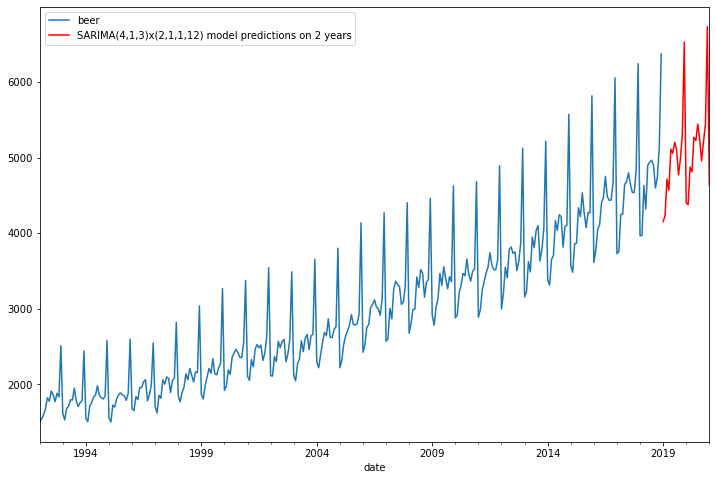

In [80]:
beer.plot(kind='line',figsize=(12,8),legend=True)
predictions.plot(legend=True,color='red')
plt.show()

# FOUR PROJECT : ALCOHOL SALES 

In [156]:
alcohol = pd.read_csv('/Users/nacersere/Downloads/UDEMY_TSA_FINAL/Data/Alcohol_Sales.csv')
alcohol.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [157]:
alcohol = alcohol.rename(columns={'S4248SM144NCEN':'Sales'})
alcohol.head()

,DATE,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [158]:
alcohol = alcohol.set_index('DATE')
alcohol.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [161]:
alcohol.index = pd.to_datetime(alcohol.index)

In [162]:
alcohol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


> Plot the data

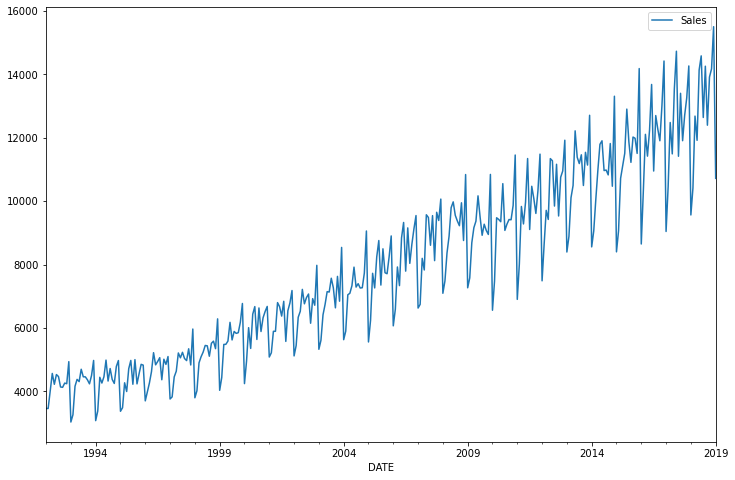

In [163]:
alcohol.plot(kind='line',figsize=(12,8))
plt.show()

In [164]:
alcohol['boxcox'] , lam = boxcox(alcohol['Sales'])

In [165]:
print(f'The optimal lambda for stabilize the variance is {lam}')

The optimal lambda for stabilize the variance is 0.2359961978310507


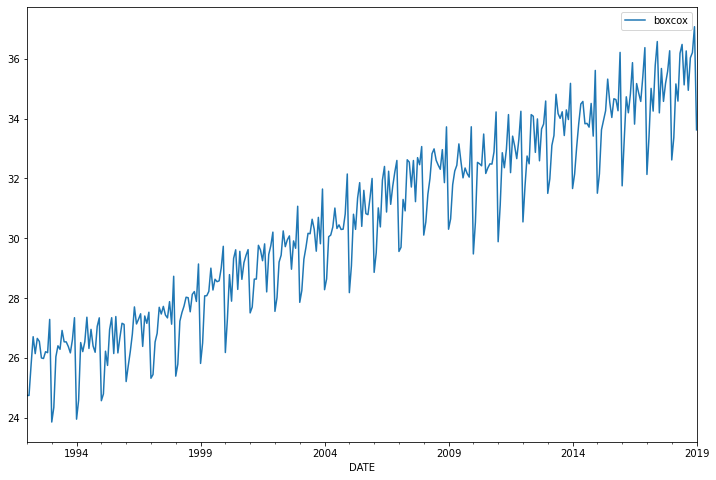

In [166]:
alcohol.plot(y='boxcox',kind='line',figsize=(12,8))
plt.show()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


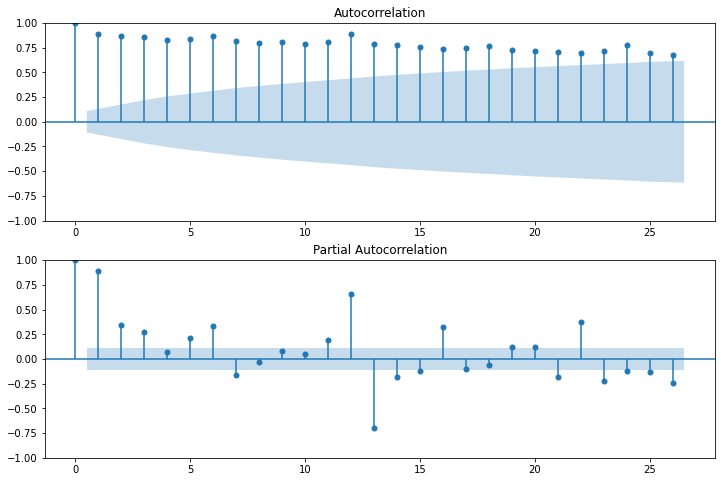

In [167]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(12,8))
plot_acf(alcohol['Sales'],zero=True,ax=ax1)
plot_pacf(alcohol['Sales'],zero=True,ax=ax2)
plt.show()

In [168]:
alcohol = alcohol.loc[:,['Sales']]
alcohol.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


                                       m = 12 

In [169]:
stepwise_fit = auto_arima(alcohol['Sales'],seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=4514.024, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4868.181, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4731.674, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4629.449, Time=0.76 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=4527.109, Time=0.98 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=4539.016, Time=0.62 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=4499.168, Time=4.92 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=4523.762, Time=1.48 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=4508.118, Time=4.18 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=4526.711, Time=5.48 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=4504.012, Time=3.70 sec
 ARIMA(3,1,2)(2,1,1)[12]             : AIC=4491.408, Time=5.22 sec
 ARIMA(3,1,2)(1,1,1)[12]             : AIC=4506.197, Time=2.52 sec
 ARIMA(3,1,2)(2,1,0)[12]

In [177]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  325
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2212.206
Date:                            Sat, 20 Aug 2022   AIC                           4444.412
Time:                                    12:46:32   BIC                           4481.842
Sample:                                         0   HQIC                          4459.372
                                            - 325                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0796      0.220     -0.361      0.718      -0.512       0.352
ar.L2          0.0954      0.089      1.075      0.282      -0.079       0.269
ar.L3          0.3186      0.070      4.561      0.000       0.182       0.456
ma.L1         -0.7548      0.228     -3.304      0.001      -1.203      -0.307
ma.L2         -0.1412      0.186     -0.761      0.447      -0.505       0.222
ar.S.L12       0.8705      0.068     12.728      0.000       0.736       1.005
ar.S.L24      -0.8232      0.060    -13.804      0.000      -0.940      -0.706
ma.S.L12      -1.1524      0.100    -11.515      0.000      -1.349      -0.956
ma.S.L24       0.6665      0.096      6.908      0.000       0.477       0.856
sigma2      8.413e+04   6945.104     12.114      0.000    7.05e+04    9.77e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                10.37
Prob(Q):                              0.68   Prob(JB):                         0.01
Heteroskedasticity (H):               4.23   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [170]:
print(len(alcohol))

325


In [171]:
print(len(alcohol) - 12)

313


In [172]:
train = alcohol.iloc[:313]
test = alcohol.iloc[313:]

In [173]:
model = SARIMAX(train['Sales'],order=(3,1,2),seasonal_order=(2,1,2,12))
result = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.81191D+00    |proj g|=  6.01504D+00

At iterate    5    f=  6.85762D+00    |proj g|=  9.04380D-02

At iterate   10    f=  6.82332D+00    |proj g|=  1.23930D-02

At iterate   15    f=  6.81800D+00    |proj g|=  2.75741D-02

At iterate   20    f=  6.81676D+00    |proj g|=  6.47556D-03

At iterate   25    f=  6.81653D+00    |proj g|=  3.85241D-03

At iterate   30    f=  6.81548D+00    |proj g|=  5.96857D-03

At iterate   35    f=  6.81537D+00    |proj g|=  3.00313D-03

At iterate   40    f=  6.81533D+00    |proj g|=  9.40578D-03

At iterate   45    f=  6.81224D+00    |proj g|=  6.00766D-02


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.80541D+00    |proj g|=  2.03281D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     52      1     0     0   2.033D-02   6.805D+00
  F =   6.8054104622256002     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [174]:
start = len(train)
end = len(train) + len(test) - 1

In [178]:
pred = result.predict(start=start,end=end).rename('SARIMAX(3, 1, 2)x(2, 1, 2, 12)')
pred

2018-02-01    10692.250414
2018-03-01    12295.615897
2018-04-01    12015.083627
2018-05-01    14111.365828
2018-06-01    14526.843136
2018-07-01    12356.570580
2018-08-01    13610.210486
2018-09-01    12308.321338
2018-10-01    13496.619093
2018-11-01    13266.321627
2018-12-01    14777.370863
2019-01-01    10218.537690
Freq: MS, Name: SARIMAX(3, 1, 2)x(2, 1, 2, 12), dtype: float64

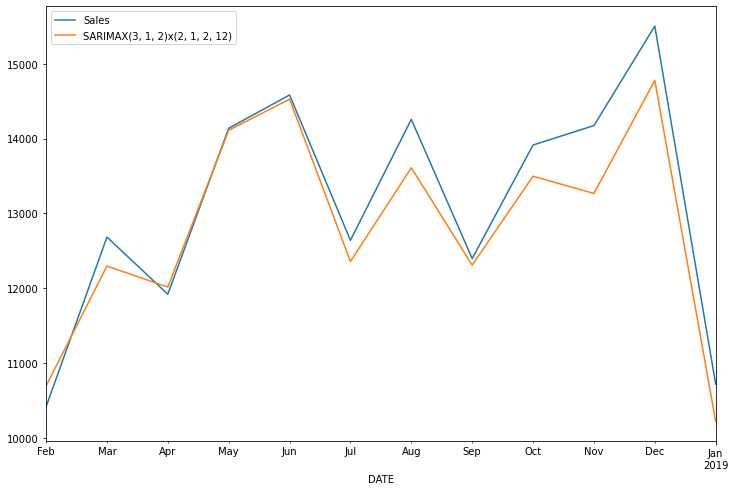

In [179]:
test.plot(kind='line',figsize=(12,8),legend=True)
pred.plot(legend=True)
plt.show()

In [181]:
rmse(test['Sales'],pred)

458.4325724402633

In [185]:
test.mean()

Sales    13111.75
dtype: float64

In [186]:
model = SARIMAX(alcohol['Sales'],order=(3,1,2),seasonal_order=(2,1,2,12))
result = model.fit()

/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18793D+00    |proj g|=  3.69965D+00

At iterate    5    f=  6.86401D+00    |proj g|=  6.29293D-02

At iterate   10    f=  6.84310D+00    |proj g|=  1.64167D-02

At iterate   15    f=  6.83887D+00    |proj g|=  2.23672D-02

At iterate   20    f=  6.83776D+00    |proj g|=  4.95119D-03

At iterate   25    f=  6.83743D+00    |proj g|=  4.28286D-03

At iterate   30    f=  6.83536D+00    |proj g|=  3.47967D-03

At iterate   35    f=  6.83505D+00    |proj g|=  9.25386D-04

At iterate   40    f=  6.83501D+00    |proj g|=  1.23131D-03

At iterate   45    f=  6.83403D+00    |proj g|=  2.75841D-02


/Users/nacersere/miniforge3/envs/mydeeplearning_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.80679D+00    |proj g|=  2.48698D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     54      1     0     0   2.487D-02   6.807D+00
  F =   6.8067875102444919     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [187]:
start = len(alcohol)
end = len(alcohol) + 12 

In [196]:
pred = result.predict(start=start,end=end,dynamic=True).rename('SARIMAX(3, 1, 2)x(2, 1, 2, 12) model predictions on 1 year')
pred

2019-02-01    11409.017884
2019-03-01    13155.508652
2019-04-01    13007.913599
2019-05-01    14744.433938
2019-06-01    15006.356782
2019-07-01    13788.534492
2019-08-01    14514.839547
2019-09-01    13513.560980
2019-10-01    14786.237507
2019-11-01    14387.722763
2019-12-01    16424.800430
2020-01-01    11343.865473
2020-02-01    12190.307470
Freq: MS, Name: SARIMAX(3, 1, 2)x(2, 1, 2, 12) model predictions on 1 year, dtype: float64

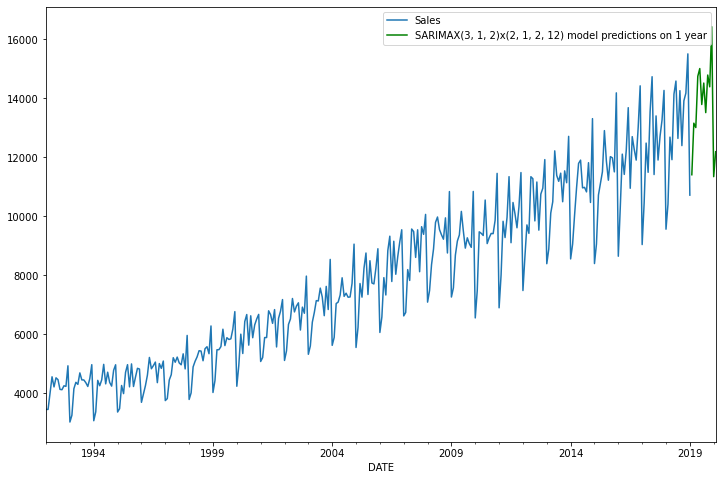

In [197]:
alcohol.plot(kind='line',figsize=(12,8),legend=True)
pred.plot(legend=True,color='green')
plt.show()